In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('./data/sleep_stage_info.csv')

In [3]:
mini_list = [999]

In [4]:
mini_df = df[df['patient_id'].isin(mini_list)]

In [15]:
mini_df

,patient_id,stage_start_time,stage_end_time,stage_duration,stage_type,raw_audio_file_id
50,999,0.0,30.0,30.0,Wake,00000999_01_000
51,999,30.0,60.0,30.0,NonREM1,00000999_01_001
52,999,60.0,180.0,120.0,NonREM2,00000999_01_002
53,999,180.0,210.0,30.0,NonREM1,00000999_01_003
54,999,210.0,870.0,660.0,NonREM2,00000999_01_004
...,...,...,...,...,...,...
173,999,13770.0,14310.0,540.0,NonREM2,00000999_04_123
174,999,14310.0,14340.0,30.0,NonREM1,00000999_04_124
175,999,14340.0,14460.0,120.0,NonREM2,00000999_04_125
176,999,14460.0,14520.0,60.0,NonREM1,00000999_05_126


In [21]:
start = mini_df[mini_df['stage_type'] == 'REM']['stage_start_time'].values
end = mini_df[mini_df['stage_type'] == 'REM']['stage_end_time'].values
last = int(mini_df['stage_end_time'].values[-1])
print(len(start))

4


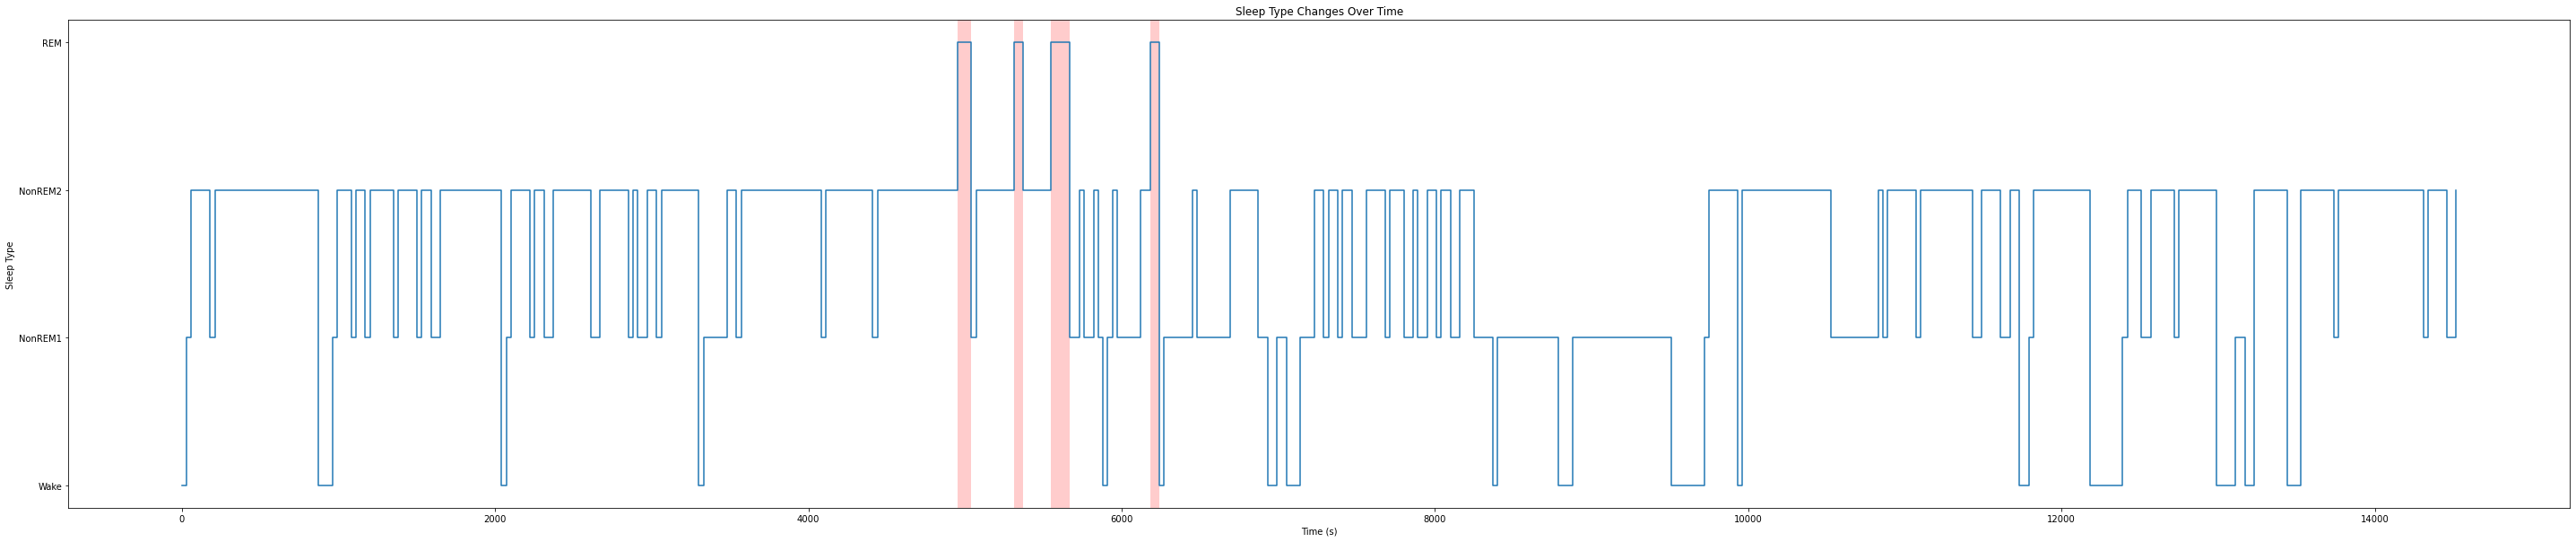

In [22]:
# visualize sleep type changes over time step plot
# highlight REM sleep stages

plt.figure(figsize=(50, 10))
plt.step(mini_df['stage_start_time'], mini_df['stage_type'], where='post')
plt.xlabel('Time (s)')
plt.ylabel('Sleep Type')
plt.title('Sleep Type Changes Over Time')

plt.axvspan(start[0], end[0], facecolor='red', alpha=0.2)
plt.axvspan(start[1], end[1], facecolor='red', alpha=0.2)
plt.axvspan(start[2], end[2], facecolor='red', alpha=0.2)
plt.axvspan(start[3], end[3], facecolor='red', alpha=0.2)

plt.show()


In [23]:
list_df = pd.read_csv('./data/peak_algorithm_mini.csv')

In [24]:
list_df = list_df[list_df['patient_id'].isin(mini_list)]

In [25]:
time_idx = [x for x in range(0, last, 10)]

In [26]:
len(time_idx)

1482

In [27]:
list_df['time_idx'] = time_idx

In [29]:
list_df

,sliced_audio_file_id,peak_algorithm,patient_id,time_idx
1788,00000999_01_000_000,3,999,0
1789,00000999_01_000_001,1,999,10
1790,00000999_01_000_002,5,999,20
1791,00000999_01_001_000,5,999,30
1792,00000999_01_001_001,3,999,40
...,...,...,...,...
3265,00000999_05_127_025,6,999,14770
3266,00000999_05_127_026,10,999,14780
3267,00000999_05_127_027,7,999,14790
3268,00000999_05_127_028,2,999,14800


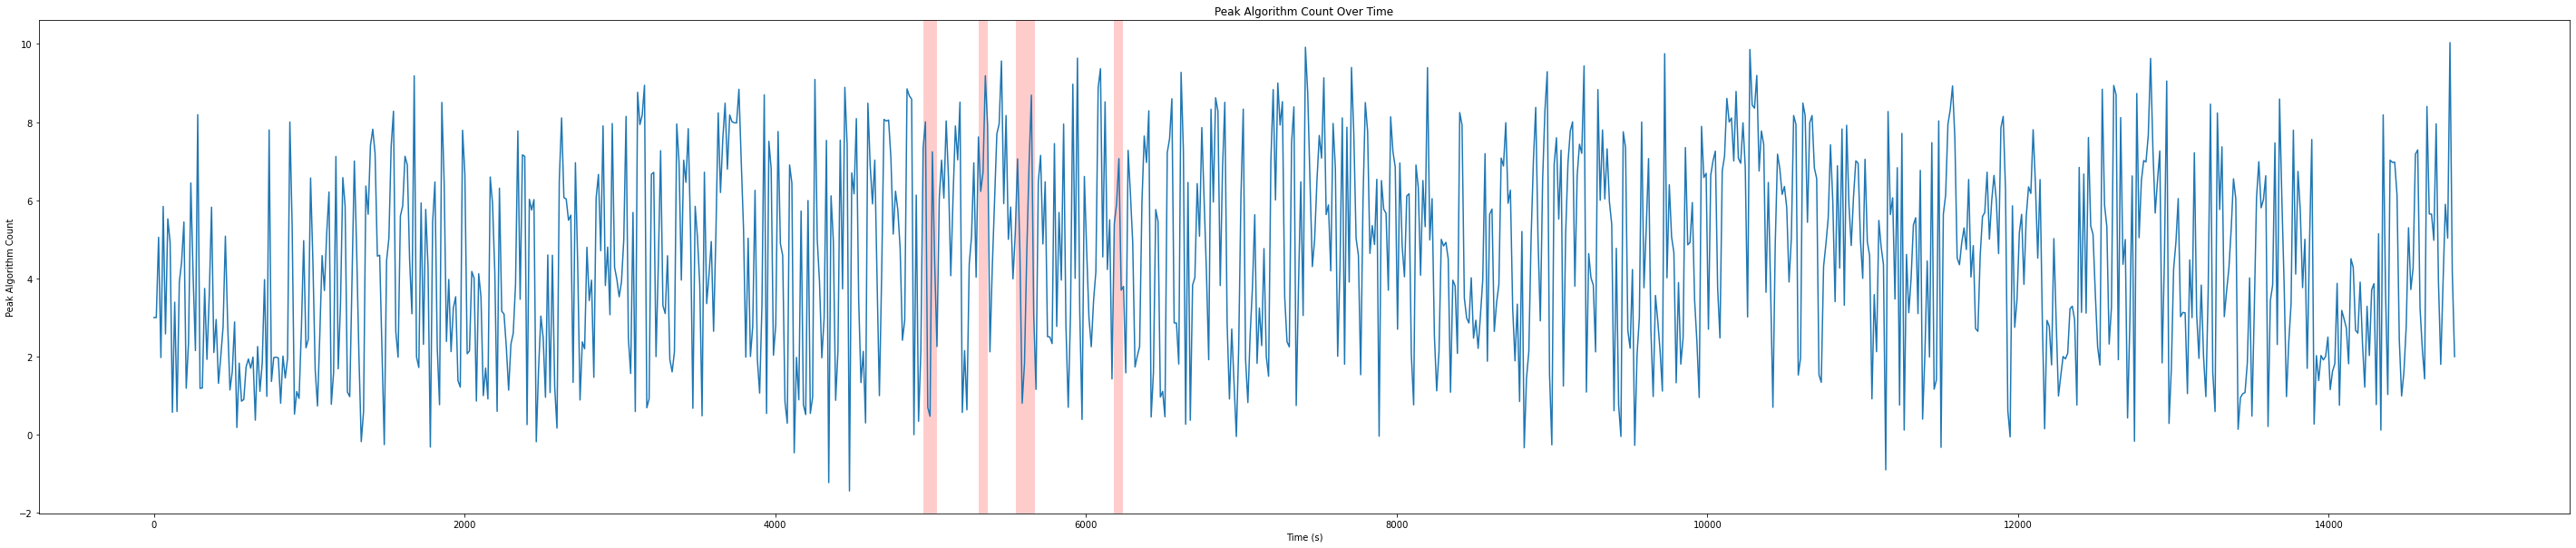

In [33]:
# visualize peak_algorithm counts over time

from scipy.interpolate import make_interp_spline, BSpline

spl = make_interp_spline(list_df['time_idx'], list_df['peak_algorithm'], k=3)  # type: BSpline
xnew = np.linspace(list_df['time_idx'].min(), list_df['time_idx'].max(), 1000)
ynew = spl(xnew)

plt.figure(figsize=(50, 10))
plt.plot(xnew, ynew)
plt.xlabel('Time (s)')
plt.ylabel('Peak Algorithm Count')
plt.title('Peak Algorithm Count Over Time')

plt.axvspan(start[0], end[0], facecolor='red', alpha=0.2)
plt.axvspan(start[1], end[1], facecolor='red', alpha=0.2)
plt.axvspan(start[2], end[2], facecolor='red', alpha=0.2)
plt.axvspan(start[3], end[3], facecolor='red', alpha=0.2)

plt.show()

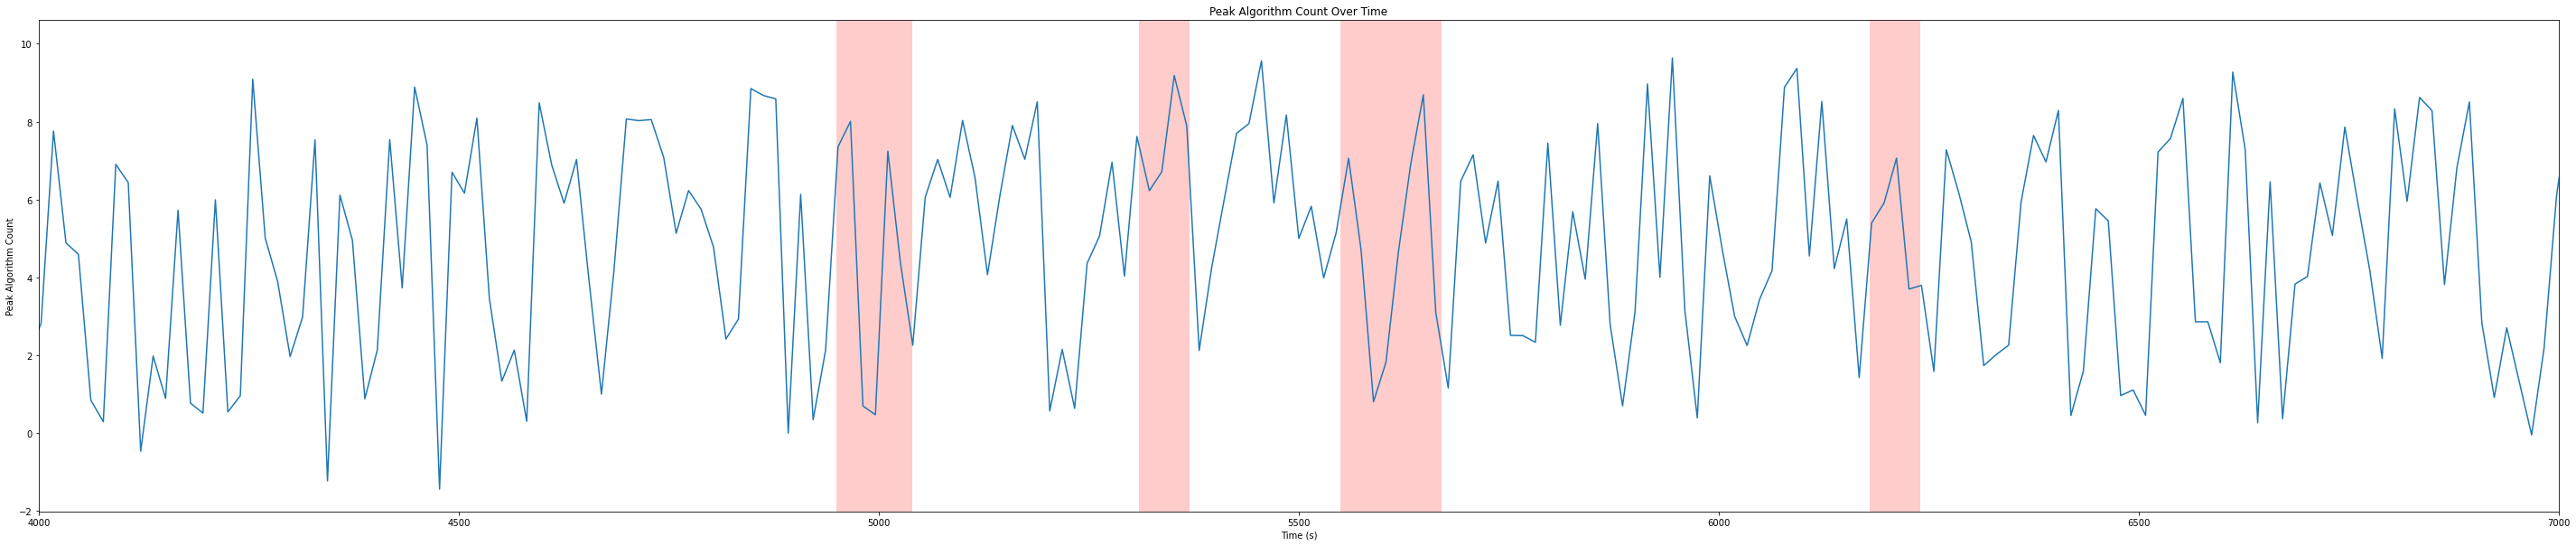

In [35]:
# see only after 10000 seconds

plt.figure(figsize=(50, 10))
plt.plot(xnew, ynew)
plt.xlabel('Time (s)')
plt.ylabel('Peak Algorithm Count')
plt.title('Peak Algorithm Count Over Time')

plt.axvspan(start[0], end[0], facecolor='red', alpha=0.2)
plt.axvspan(start[1], end[1], facecolor='red', alpha=0.2)
plt.axvspan(start[2], end[2], facecolor='red', alpha=0.2)
plt.axvspan(start[3], end[3], facecolor='red', alpha=0.2)
plt.xlim(4000, 7000)
plt.show()

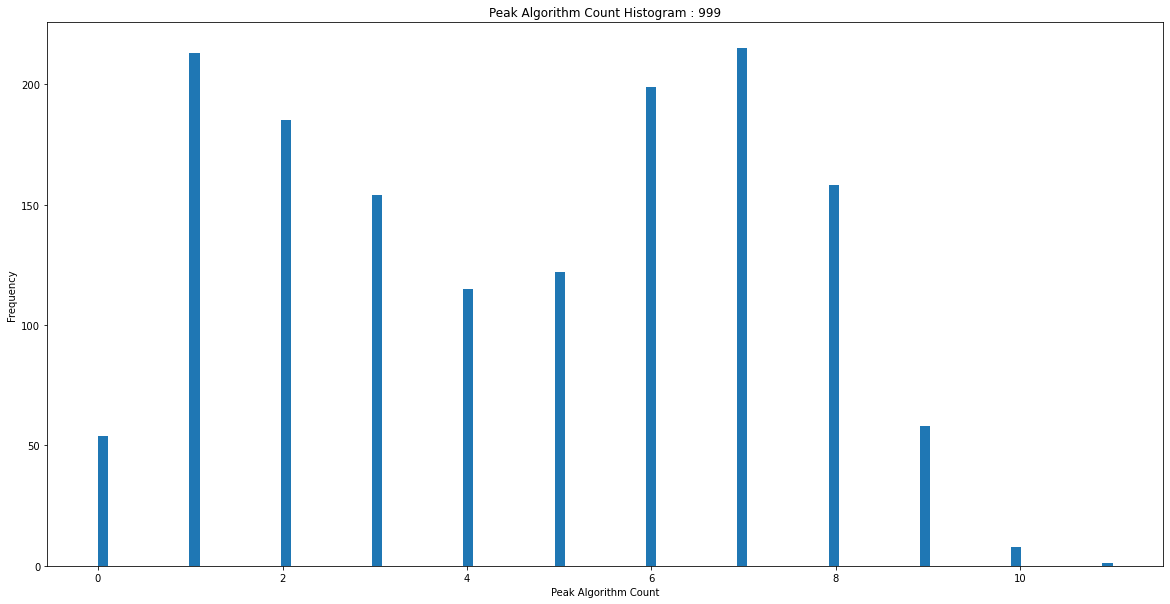

In [37]:
# peak count histogram

plt.figure(figsize=(20, 10))
plt.hist(list_df['peak_algorithm'], bins=100)
plt.xlabel('Peak Algorithm Count')
plt.ylabel('Frequency')
plt.title('Peak Algorithm Count Histogram : 999')

plt.show()